# Data Visualization

_Damian Trilling and Penny Sheets_

This notebook illustrates what you should consider when making visualizations.

While we will use

- `matplotlib`
- `seaborn`

## Interactive data visualization

Next week, we will explicitly talk about how to make interactive graphs. For
instance,

- `bokeh`
- `pygal`

are quite useful for that. However, in order to do that, it's good to have a
understandig of standard, static plots first (and, of course, they are still
very relevant for everything that's printed).

## Choosing the right library

Some background about our modules of choice:

`matplotlib` is the standard work horse. It's neither smart nor beautiful, but
the decent option that just does its job. It is what happens under the hood if
you use the `.plot()` methods in `pandas`, but you can also just directly feed
it some lists and dictionaries as input.

`seaborn` offers more beautiful output, has many more options, is smarter and
can produce advanced statistical plots. It is also a bit easier to use. Its a
bit like `ggplot2` in R.

As you will see when browsing examples on https://python-graph-gallery.com/ ,
both `matplotlib` and `seaborn` are very popular, and some of the examples use
one, some the other. You can do all the standard stuff (like bar charts) in
either of them, and we therefore introduce you to both (after all, when googling
for help, you are very likely to come accross both libraries).


## Preparation

Import some modules, load some example datasets. (Note, these ones with 'sns'
beforehand are datasets that come with the seaborn package. In this case you
don't need any extra steps if you're running CoLab.)

We are going to import these datasets - two from seaborn, and one that we
created in our notebooks last week - in order to use them later for the
visualizations.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# we also want the 'wijken_long.csv' file we created last week.
# We created it in 05-aggregate_wozwaarde.ipynb, under the section "From Wide to Long".
# In case you don't have it, you need to download wozwaarde.csv
# from github and then run the code in 05-aggregate_wozwaarde.ipynb, which will create wijken_long.csv and save it
# to your computer.  If you're running colab, you have to ensure this file is in your google drive so you can
# get it there using the /mnt code.

woz = pd.read_csv('wijken_long.csv')
woz.head()

#for google colab people:

#from google.colab import drive
#drive.mount('/mnt')
#woz = pd.read_csv('/mnt/My Drive/datajournalism/wijken_long.csv')

,Unnamed: 0,wijk,stadsdeel,year,woz-waarde
0,0,Burgwallen-Oude Zijde,Centrum,2014,263417.0
1,1,Burgwallen-Nieuwe Zijde,Centrum,2014,267895.0
2,2,Grachtengordel-West,Centrum,2014,490251.0
3,3,Grachtengordel-Zuid,Centrum,2014,469946.0
4,4,Nieuwmarkt/Lastage,Centrum,2014,295239.0


It turns out that the first column of our csv file contained the index (= row
number), but we don't want that (after all, we have an index anyway and it
doesn't mean anything to us). We can delete (`drop`) this column (which is, as
we see above, called "Unnamed: 0"): `axis=1` specifies that we want to delete a
row, not a column, and `inplace` specifies whether we want to directly modify
the existing dataframe (i.e., override it), or whether we want to return
another, new, dataframe instead.


In [7]:
woz.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
woz.describe()

,year,woz-waarde
count,490.000000,4.780000e+02
mean,2016.000000,2.856571e+05
std,1.415659,1.369124e+05
min,2014.000000,7.813700e+04
25%,2015.000000,1.914288e+05
50%,2016.000000,2.516580e+05
75%,2017.000000,3.329392e+05
max,2018.000000,1.003743e+06


Let's also make a dataframe in which we do not split up housing prices per
"stadsdeel" (district), but just take the median (or mean) across all of them
(per year). Hence, we group by year, and then aggregate by taking the median (or
mean) within each of these groups:


In [9]:
woz_simple = woz.groupby('year').agg("median", numeric_only = True)   # or np.mean, if you want to. 
#Think about reasons why it might be better to choose a mean versus a median housing price.  Revisit the 'statistics
#for journalists' reading in week 3, if you need to.

woz_simple

,woz-waarde
year,
2014,219418.0
2015,225086.5
2016,242833.0
2017,288667.5
2018,333029.0


# 0. A very brief intro to the syntax of matplotlib and seaborn

## 0.1 Matplotlib (directly)

The general idea with matplotlib, if you use it directly, is to create an empty
figure, and then add elements (plots, labels, titles, ...) to it, and then
either save or show the image.

_This is especially useful if your data are not in a pandas dataframe, but, for
instance, in some lists._

There are multiple ways of plotting things with matplotlib, but the most common
one (illustrated below) is probably to just pass lists of values:

```
plt.plot(list1, list2)
```


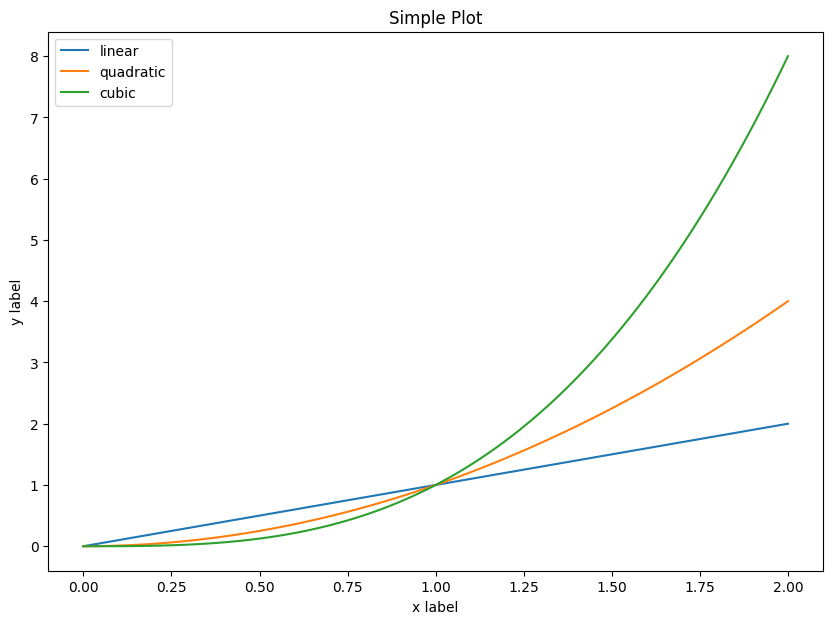

In [10]:
# example adapted from https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

# let's generate some sample data
x = np.linspace(0, 2, 100)  # this gives you an array (sth like a list) 
                            # with all numbers from 0 to 2, in 100 steps. [0, 0.02, 0.04, ... 2.0]

# create a figure (a canvas)
plt.figure(figsize=(10,7))

# plot things on that canvas
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

# add labels, titles, legends, ...
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

# Save and/or show the figure. Use ? to get different options for file formats etc
plt.savefig('test.png',dpi=300)
plt.show()

## 0.2 Matplotlib (via pandas)

The most useful way for you to interact with matplotlib, however, is via pandas.
Pandas dataframes and series have build-in methods that call matplotlib 'under
the hood', which makes it very easy for you to use.

You essentially just add `.plot()` to a table-like object, and it will produce a
plot. With the `kind` argument, you can specify which type of plot you want
(pie, bar, line, etc)

The nice thing is that you still can use the native matplotlib functions
presented above, for instance `plt.savefig()` if you want to save the figures to
your desktop (or google drive).


<Axes: xlabel='year'>

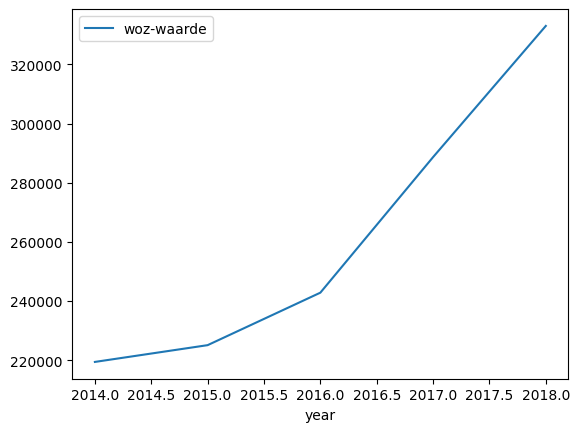

In [11]:
#Here we plot that simple woz median value dataset, that literally only consists of years and median values.
woz_simple.plot()
# plt.savefig('wozplot.png')

<Axes: xlabel='day'>

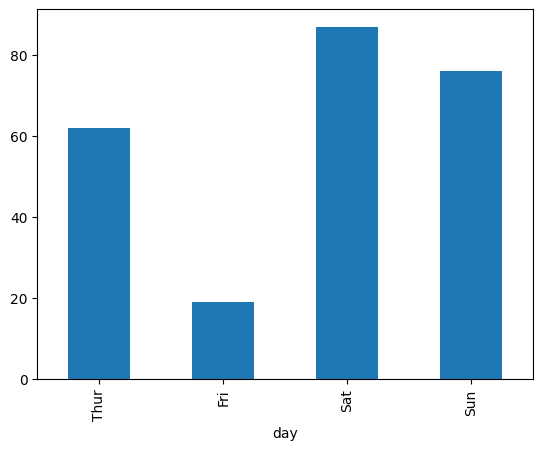

In [12]:
#here we're using the 'tips' dataset. Can you figure out, based on the code here, what 
#we are plotting on the y axis?
tips['day'].value_counts(sort=False).plot(kind='bar')

## 0.3 Seaborn

Seaborn is built on matplotlib, but uses a different grammar. You may find it,
in fact, more intuitive, as you basically provide each seaborn function with a
couple of arguments, namely

```
data : the name of the dataframe with all your data
x    : which column to plot on the x axis
y    : which column to plot on the y axis
hue  : which column to use to group the data (and represent by different colors)
col  : which column to use to group the data into different sub-plots ('columns')
style: which column to use to group the data into different styles of the marker
size : which column to use to change the size of the marker
...
```

Look at this example:


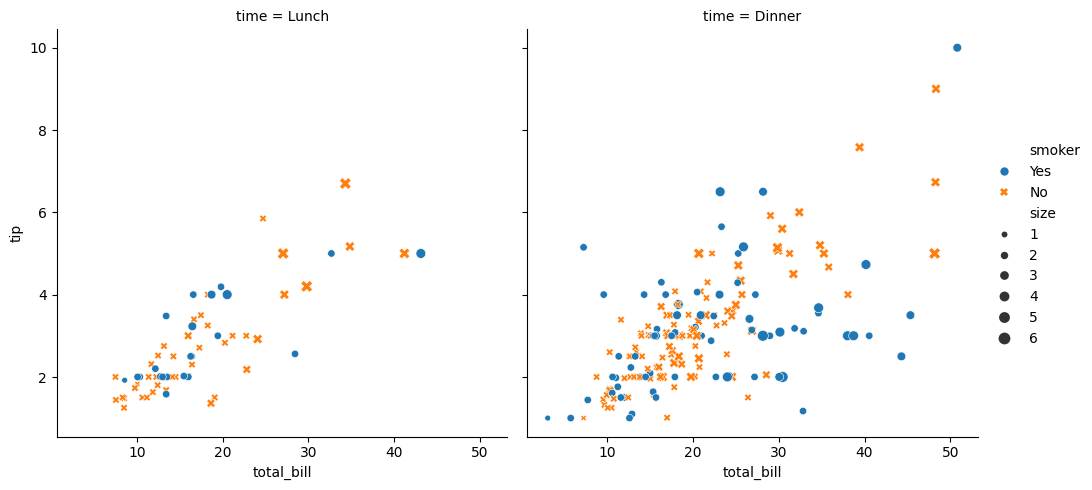

In [13]:
# example taken fromn https://seaborn.pydata.org/introduction.html#introduction

sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

#Feel free to play around with these parameters and see what changes.

In other words, when using seaborn, we do not use the method of a pandas object
(as with matplotlib, see above), but call the seaborn function directly and pass
on the dataframe with the `data = ...` argument


Let's now move through a couple of examples for each chart type that we
discussed on Monday.


# 1. Pie charts

- proportions
- categorical (nominal) data
- makes only sense if adds up to 100%

Related: donut plots, possibly with subgroups
(https://python-graph-gallery.com/163-donut-plot-with-subgroups/)


<Axes: ylabel='count'>

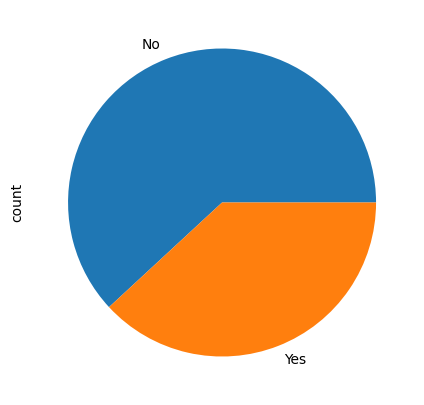

In [14]:
tips['smoker'].value_counts().plot(kind='pie', figsize=(5,5))

<Axes: ylabel='count'>

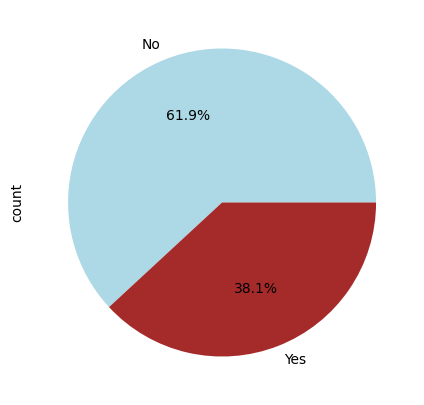

In [15]:
tips['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','brown'], figsize=(5,5))
#experiment with what happens when you take out the "figsize" specification.

<Axes: ylabel='count'>

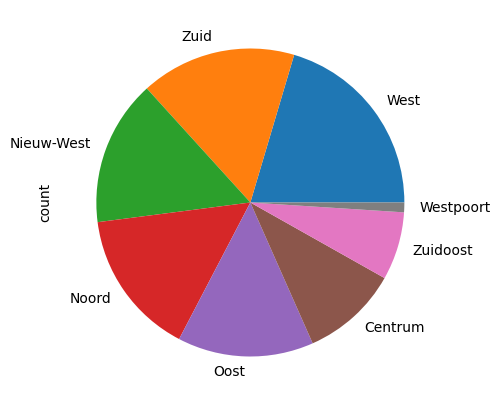

In [16]:
woz['stadsdeel'].value_counts().plot(kind='pie', figsize = (5, 5))

<Axes: ylabel='count'>

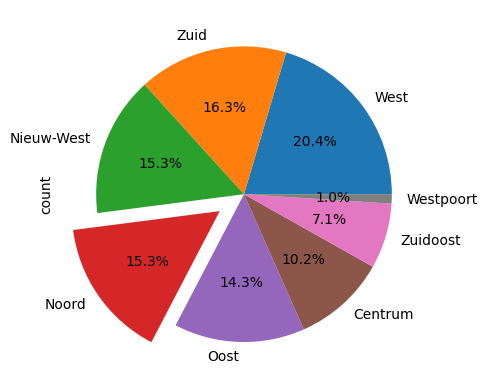

In [17]:
woz['stadsdeel'].value_counts().plot(kind='pie',explode=[0,0,0,0.2,0,0,0,0], autopct='%1.1f%%')

**Fun fact**! You cannot do a pie chart in seaborn. Probably because the authors
of seaborn also think that there are very few use cases in which pie charts are
a great choice ;-) . So, you need to stick with matplotlib in case you want to
stick to pie charts.


# 2. Bar charts

- counts per (discrete) category
- or: other statistical property (e..g, mean) per (discrete) category
- different variations (e.g., stacked bar charts)


<Axes: xlabel='smoker'>

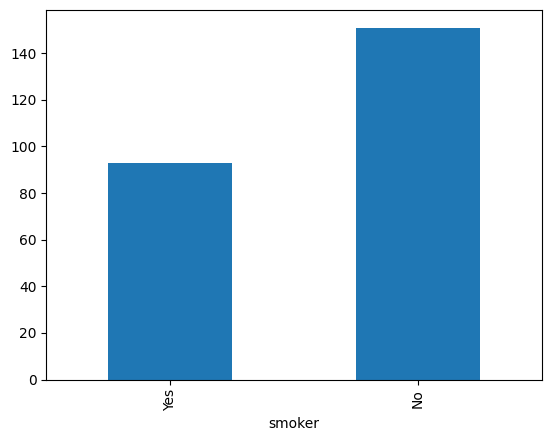

In [18]:
# with matplotlib
tips['smoker'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='smoker', ylabel='count'>

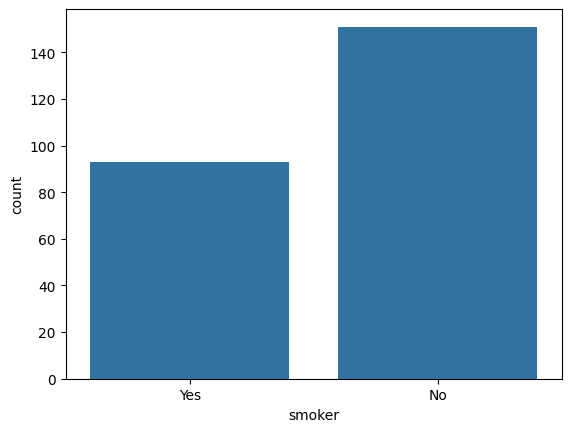

In [19]:
# with seaborn
# Look how sns has a function that integrates counting of values and producing the bar chart.
sns.countplot(x = 'smoker', data=tips)

In the following example, we do not want to calculate counts and then plot them
in a bar chart, but rather plot the (implicitly calculated) means:


/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/431734180.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="day", y="total_bill", data=tips, ci=95)


<Axes: xlabel='day', ylabel='total_bill'>

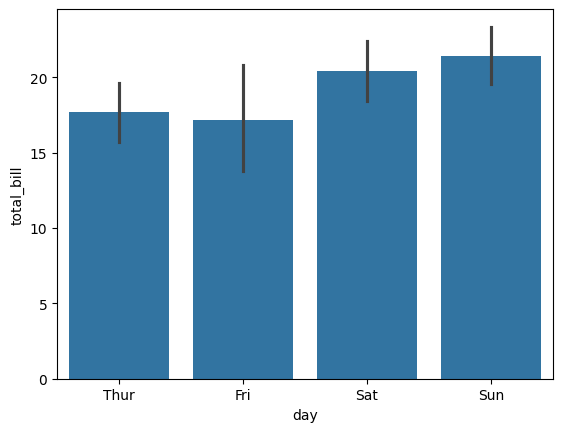

In [20]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95)

But we could also do something like this 'by hand' in pandas (with matplotlib
being called under the hood):

**Discuss pros and cons and applications of both approaches!**

Try to understand the underlying logic behind them! (and then make a decision on
what to use for your own purposes)


/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/1636493039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].agg('mean').plot(kind='bar')


<Axes: xlabel='day'>

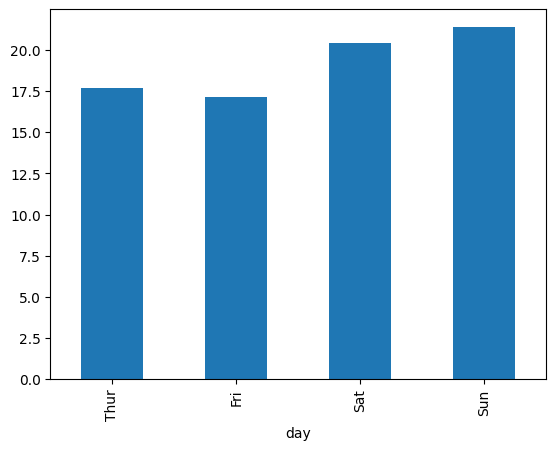

In [21]:
tips.groupby('day')['total_bill'].agg('mean').plot(kind='bar')

As always, use the ? to get more help:


In [22]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 

### Grouped barplots


/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/1430271356.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ci=None)


<Axes: xlabel='day', ylabel='total_bill'>

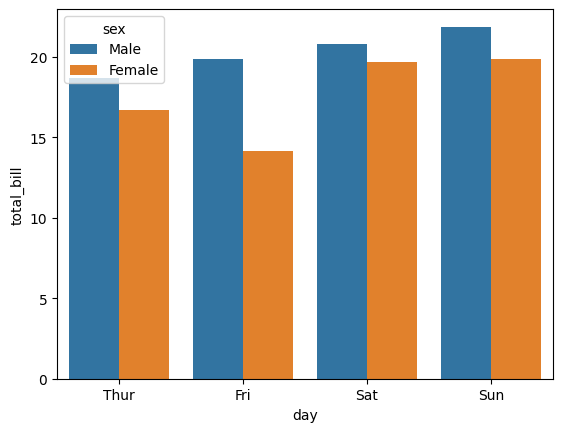

In [23]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ci=None)

If we want to further split up by time, we can use the `.catplot()` function
instead, which is specifically designed for handling categorical data (Lunch vs
Dinner, in our case). Note how closely this command resembles the one above!


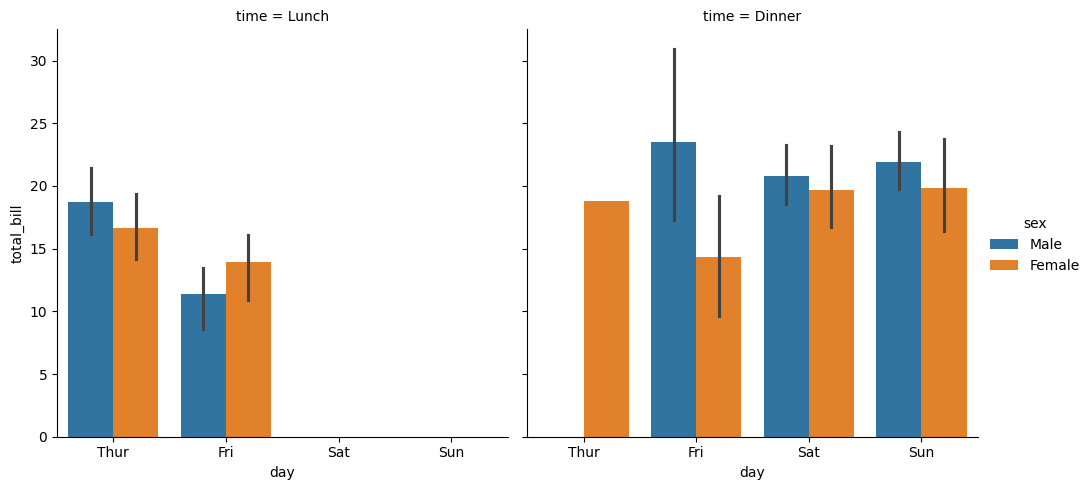

In [24]:
sns.catplot(x="day", y="total_bill", hue="sex", col = 'time', kind='bar', data=tips)

<Axes: xlabel='stadsdeel', ylabel='woz-waarde'>

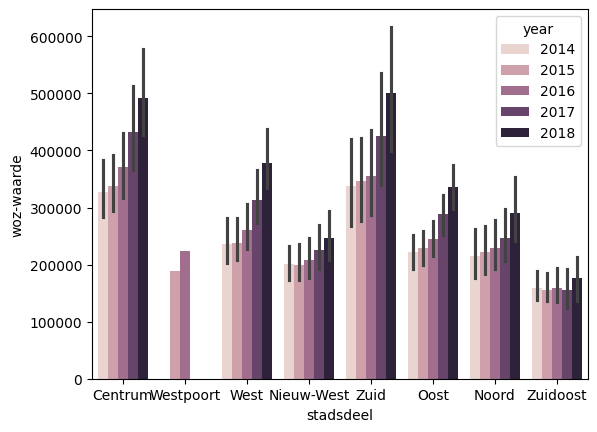

In [25]:
sns.barplot(x="stadsdeel", y="woz-waarde", hue='year', data=woz)

Let's now make this a bit prettier.

We first set the style for seaborn plots (note that this affects ALL following
graphs you are going to plot, until you set the style to sth different or
restart the kernel).

We then make use of the fact that seaborn is, in fact, built upon matplotlib and
can therefore plot onto a matplotlib canvas. We create such a canvas (in this
case, one with one subplot, called (somewhat counter-intuitively) an axis), and
then tell seaborn to plot into the subplot area `ax` that we just created. This
allows us to combine multiple plots in one, and to change its size.


/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/877480700.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax, x="stadsdeel", y="woz-waarde", hue='year', data=woz, ci = None)


<Axes: xlabel='stadsdeel', ylabel='woz-waarde'>

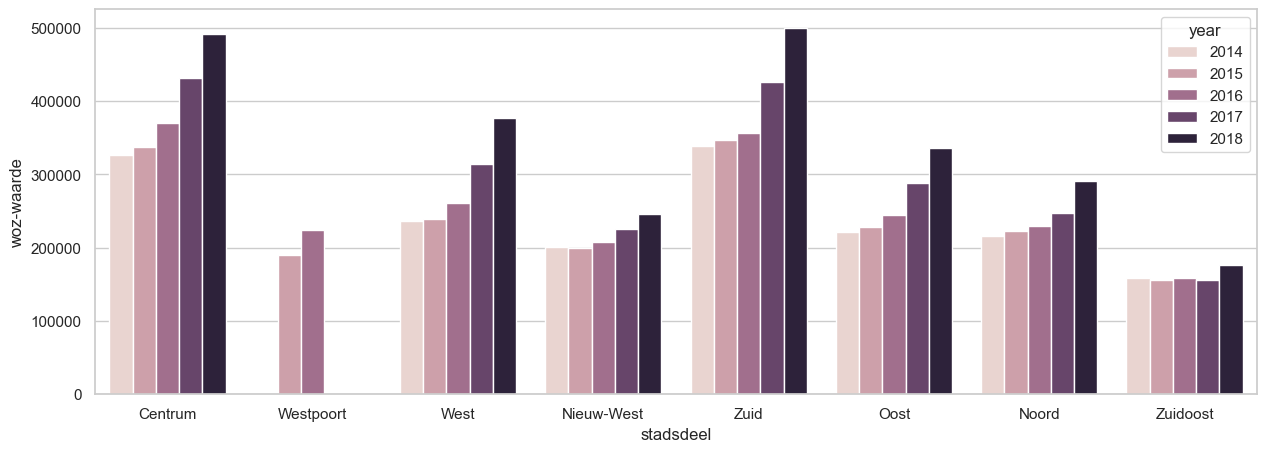

In [26]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=ax, x="stadsdeel", y="woz-waarde", hue='year', data=woz, ci = None)

/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/2764374043.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax, y="stadsdeel", x="woz-waarde", hue='year', data=woz, ci = None, orient='h')


<Axes: xlabel='woz-waarde', ylabel='stadsdeel'>

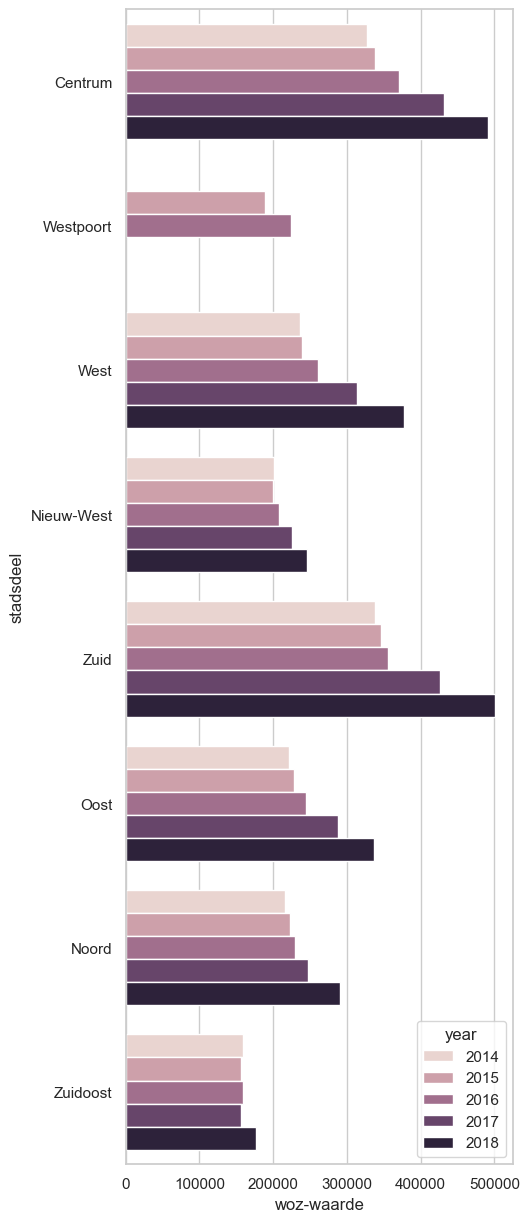

In [27]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5,15))
sns.barplot(ax=ax, y="stadsdeel", x="woz-waarde", hue='year', data=woz, ci = None, orient='h')

# 3. Point charts

- similar to bar charts
- but: can look 'cleaner'
- but: can give a clearer message if the categories can be meaningfully ordered

Compare the following two charts that present the same data:


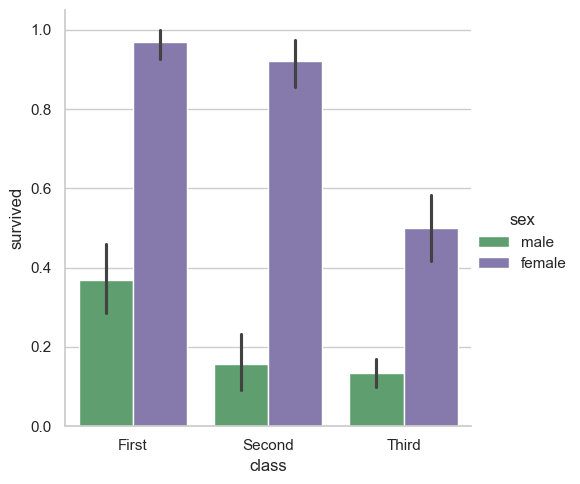

In [28]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            kind="bar", data=titanic)

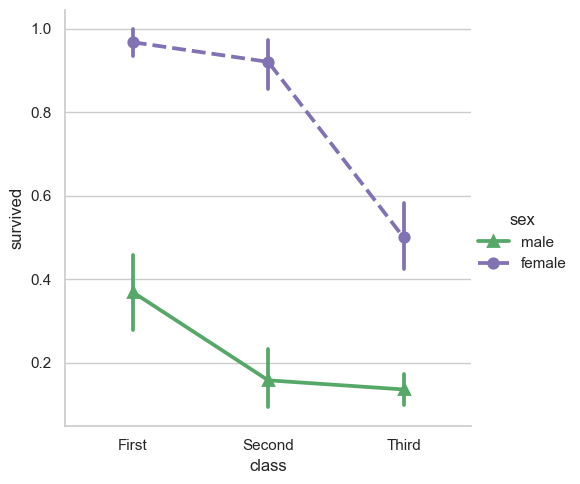

In [29]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

# 3. Line charts

- ordered (and typically evenly spaced) values on x-axis
- x-axis has many (in theory: contious) measurements
- most typical: plot some value(s) over time


<Axes: xlabel='year', ylabel='woz-waarde'>

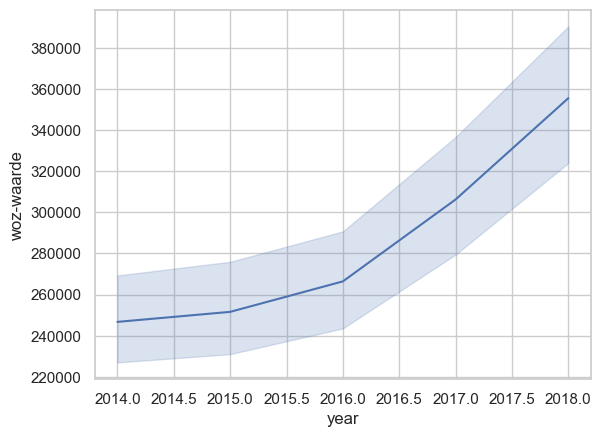

In [30]:
sns.lineplot(x='year', y='woz-waarde', data=woz)

/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/1754195048.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='woz-waarde', data=woz ,ci=None)


<Axes: xlabel='year', ylabel='woz-waarde'>

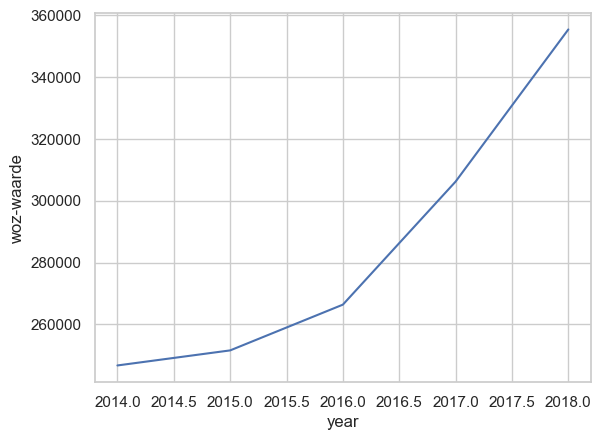

In [31]:
sns.lineplot(x='year', y='woz-waarde', data=woz ,ci=None)

<Axes: xlabel='year', ylabel='woz-waarde'>

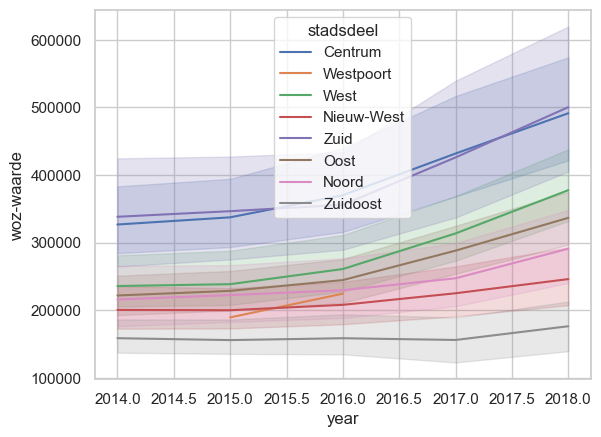

In [32]:
sns.lineplot(x='year', y='woz-waarde', hue='stadsdeel', data=woz)

/var/folders/l0/0m8rr1_910j7vgvw7jz29qgc0000gn/T/ipykernel_9693/1833850091.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  woz.groupby(['year','stadsdeel']).agg(sum).unstack().plot()


<Axes: xlabel='year'>

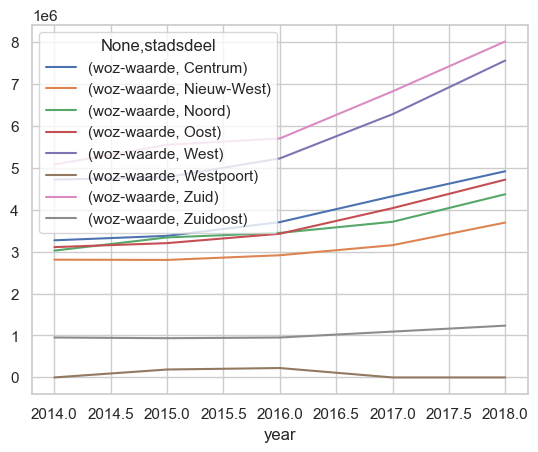

In [33]:
# or using the more complicated pandas/matplotlib syntax
# look back to the slides from last week!
woz.groupby(['year','stadsdeel']).agg(sum).unstack().plot()

# 4. Plotting bivariate relationships


<Axes: xlabel='total_bill', ylabel='tip'>

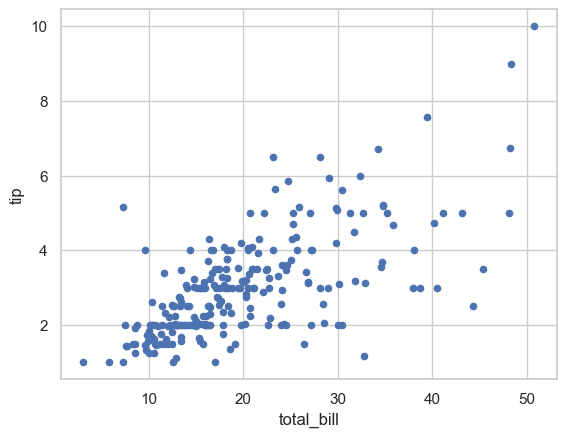

In [34]:
# pandas/matplotlib
tips.plot(x='total_bill', y='tip', kind='scatter')

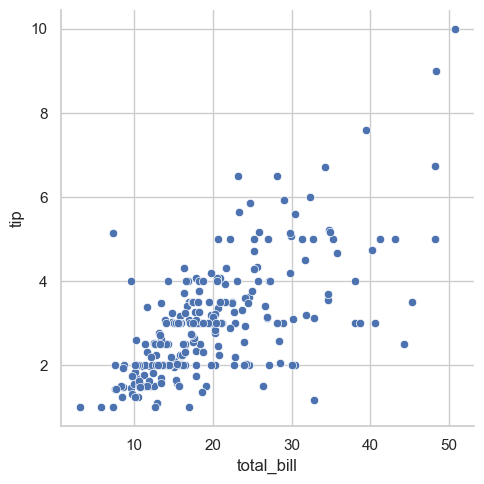

In [35]:
# the same with seaborn
sns.relplot(x='total_bill', y='tip', data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

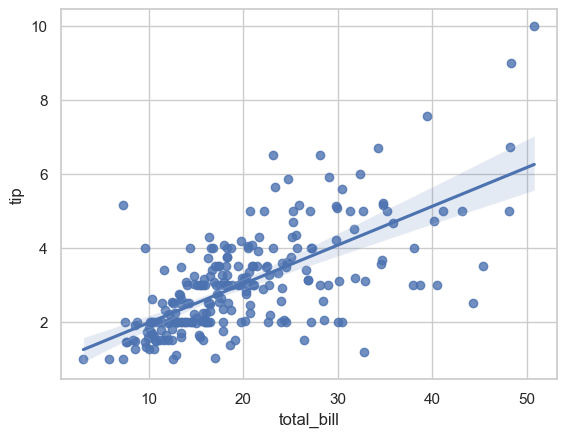

In [36]:
# but seaborn can do more, e.g. add a regression line and confidence intervals
sns.regplot(x='total_bill', y='tip', data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

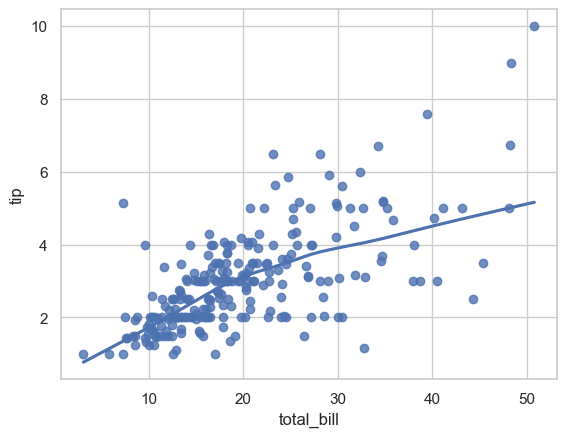

In [37]:
# Or we can draw a locally weighted regression line (lowess)
# (and much more)
sns.regplot(x='total_bill', y='tip', data=tips, lowess=True)

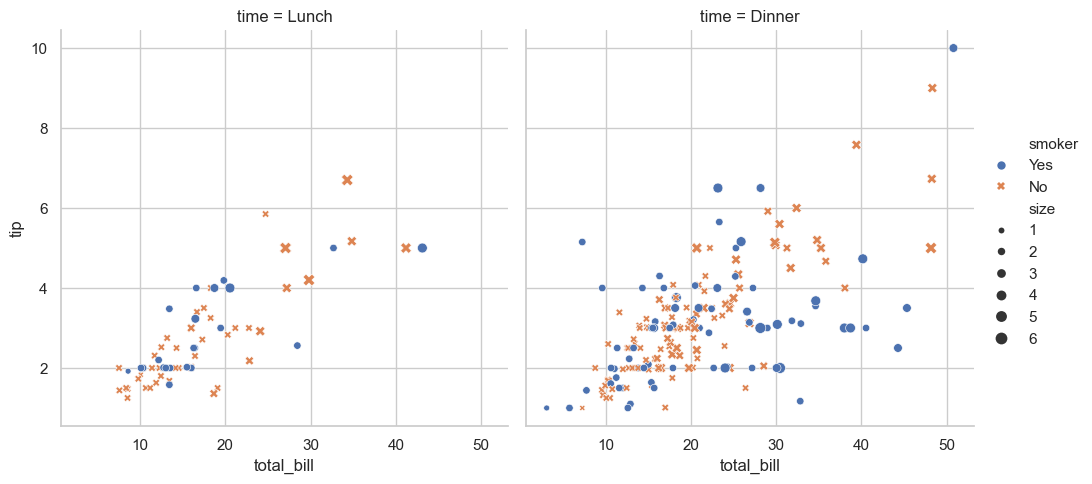

In [38]:
# again, we can add different facets
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

# 5. Additional (statistical) plots

Have a look at the seaborn website (http://seaborn.pydata.org/) or at the Python
Graph Gallery (https://python-graph-gallery.com/) for more inspiration,
including cool stuff like

- violin plots
- kernel density plots
- ...
- ...

Also, look back at our earlier notebook 03_analyzing_numbers.ipynb, and the
hexplot we present at the end.


# Now it's your turn!

**Exercise**: Take a dataset of you choice (preferably your own data) and try to
make multiple visualisations! You can work together with your neighbor if you
want to.
